## Figure 12 (Journal of Climate submission; Molina et al.)

Fig.12. Nino 3.4 region monthly SSTs ($^{\circ}$C) for the CESM1 control (a) and sensitivity experiments (b-f). The gray line indicates the SST climatology for the respective simulations, which were computed using a rolling 30-year monthly mean applied to each month individually. Thus, the 30-year monthly rolling mean was applied to January, then February, and so forth. The December and June rolling means are shown with blue and red lines, respectively. SSTs and climatology as indicated in the legend.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports

import xarray as xr
import pandas as pd
import numpy as np
from climatico import enso
from climatico.util import weighted_mean
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'

In [4]:
nino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)

In [5]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
first100_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
first100_ssts_roll = nino.monthly_climo(first100_ssts, yrsroll=30, centered=True, time='time')

In [6]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
control_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
control_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                          control_ssts.sel(time=slice('0800-01-01 00:00:00', '1600-01-01 00:00:00'))], dim='time')
control_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
control_ssts_roll = nino.monthly_climo(control_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
control_ssts_vals = control_ssts.values
control_ssts_roll_vals = control_ssts_roll.values

In [7]:
# g02sv
ds = xr.open_mfdataset(f'{directory_data}{file_g02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g02sv_ssts.sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
g02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
g02sv_ssts_roll = nino.monthly_climo(g02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
g02sv_ssts_vals = g02sv_ssts.values
g02sv_ssts_roll_vals = g02sv_ssts_roll.values

In [8]:
# g04sv
ds = xr.open_mfdataset(f'{directory_data}{file_g04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g04sv_ssts.sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
g04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
g04sv_ssts_roll = nino.monthly_climo(g04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
g04sv_ssts_vals = g04sv_ssts.values
g04sv_ssts_roll_vals = g04sv_ssts_roll.values

In [9]:
# p02sv
ds = xr.open_mfdataset(f'{directory_data}{file_p02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p02sv_ssts.sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
p02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
p02sv_ssts_roll = nino.monthly_climo(p02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
p02sv_ssts_vals = p02sv_ssts.values
p02sv_ssts_roll_vals = p02sv_ssts_roll.values

In [10]:
# p04sv
ds = xr.open_mfdataset(f'{directory_data}{file_p04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p04sv_ssts.sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
p04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
p04sv_ssts_roll = nino.monthly_climo(p04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
p04sv_ssts_vals = p04sv_ssts.values
p04sv_ssts_roll_vals = p04sv_ssts_roll.values

In [11]:
# psalt
ds = xr.open_mfdataset(f'{directory_data}{file_psalt}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
psalt_ssts = weighted_mean(ds['SST'], lat_name='lat')

# psalt index computation
ds8 = xr.open_mfdataset(f'{directory_data}b2d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.030101-035012.nc',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds8 = ds8.assign_coords(time=ds8.coords['time'] - timedelta(days=17))
ds8 = ds8.sel(time=slice('0301-01-01 00:00:00', '0351-01-01 00:00:00'))
# compute weighted mean of sst region
psalt_ssts2 = weighted_mean(ds8['SST'], lat_name='lat')

# rolling climo
psalt_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')).drop('z_t'),
                        psalt_ssts.sel(time=slice('0001-01-01 00:00:00', '0301-01-01 00:00:00')).drop('z_t'),
                        psalt_ssts2], dim='time')
psalt_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0450-12-31 00:00:00", freq="MS", calendar="noleap")

psalt_ssts_roll = nino.monthly_climo(psalt_ssts.chunk({'time':1000}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
psalt_ssts_vals = psalt_ssts.values
psalt_ssts_roll_vals = psalt_ssts_roll.values

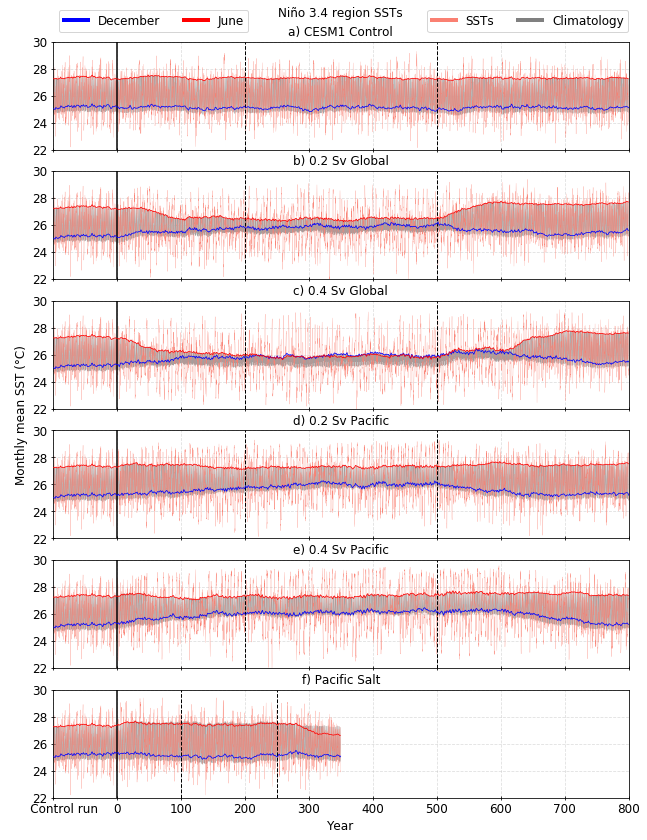

In [12]:
# -------------- create figure

fig = plt.figure(figsize=(8,12))

fig.suptitle(u'Niño 3.4 region SSTs', x=0.5, y=0.915, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 1., 0.125])

ax1.set_title('a) CESM1 Control', fontsize=12)

ax1.plot(control_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax1.plot(control_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax1.plot(np.arange(0,900*12,1)[11::12], control_ssts_roll[control_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax1.plot(np.arange(0,900*12,1)[5::12],  control_ssts_roll[control_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax1.margins(x=0)
ax1.set_xlim([0,10800])
ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax1.grid(alpha=0.4, ls='--')

ax1.set_ylim([22,30])
ax1.set_yticks([22,24,26,28,30])
ax1.set_yticklabels([22,24,26,28,30], fontsize=12)

ax1.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax1.axvline(1200, lw=1.5, c='k')
ax1.axvline(3600, lw=1., ls='--', c='k')
ax1.axvline(7200, lw=1., ls='--', c='k')

custom_lines = [Line2D([0], [0], color='salmon', lw=4),
                Line2D([0], [0], color='grey', lw=4)]
ax1.legend(custom_lines, ['SSTs', 'Climatology'], fontsize=12, bbox_to_anchor=(1.01, 1.35), ncol=2)

# --------------

ax2 = plt.axes([0., 0.6, 1., 0.125])

ax2.set_title('b) 0.2 Sv Global', fontsize=12)

ax2.plot(g02sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax2.plot(g02sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax2.plot(np.arange(0,900*12,1)[11::12], g02sv_ssts_roll[g02sv_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax2.plot(np.arange(0,900*12,1)[5::12],  g02sv_ssts_roll[g02sv_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax2.margins(x=0)
ax2.set_xlim([0,10800])
ax2.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax2.grid(alpha=0.4, ls='--')

ax2.set_ylim([22,30])
ax2.set_yticks([22,24,26,28,30])
ax2.set_yticklabels([22,24,26,28,30], fontsize=12)

ax2.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax2.axvline(1200, lw=1.5, c='k')
ax2.axvline(3600, lw=1., ls='--', c='k')
ax2.axvline(7200, lw=1., ls='--', c='k')

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
ax2.legend(custom_lines, ['December', 'June'], fontsize=12, bbox_to_anchor=(0.35, 2.55), ncol=2)

# --------------

ax3 = plt.axes([0., 0.45, 1., 0.125])

ax3.set_title('c) 0.4 Sv Global', fontsize=12)

ax3.plot(g04sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax3.plot(g04sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax3.plot(np.arange(0,900*12,1)[11::12], g04sv_ssts_roll[g04sv_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax3.plot(np.arange(0,900*12,1)[5::12],  g04sv_ssts_roll[g04sv_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax3.margins(x=0)
ax3.set_xlim([0,10800])
ax3.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax3.grid(alpha=0.4, ls='--')

ax3.set_ylim([22,30])
ax3.set_yticks([22,24,26,28,30])
ax3.set_yticklabels([22,24,26,28,30], fontsize=12)

ax3.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax3.axvline(1200, lw=1.5, c='k')
ax3.axvline(3600, lw=1., ls='--', c='k')
ax3.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax4 = plt.axes([0., 0.3, 1., 0.125])

ax4.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax4.plot(p02sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax4.plot(p02sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax4.plot(np.arange(0,900*12,1)[11::12], p02sv_ssts_roll[p02sv_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax4.plot(np.arange(0,900*12,1)[5::12],  p02sv_ssts_roll[p02sv_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax4.margins(x=0)
ax4.set_xlim([0,10800])
ax4.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax4.grid(alpha=0.4, ls='--')

ax4.set_ylim([22,30])
ax4.set_yticks([22,24,26,28,30])
ax4.set_yticklabels([22,24,26,28,30], fontsize=12)
a = u"\u00b0"
ax4.set_ylabel('Monthly mean SST ('+a+'C)', fontsize=12, ha='left')

ax4.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax4.axvline(1200, lw=1.5, c='k')
ax4.axvline(3600, lw=1., ls='--', c='k')
ax4.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax5 = plt.axes([0., 0.15, 1., 0.125])

ax5.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax5.plot(p04sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax5.plot(p04sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax5.plot(np.arange(0,900*12,1)[11::12], p04sv_ssts_roll[p04sv_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax5.plot(np.arange(0,900*12,1)[5::12],  p04sv_ssts_roll[p04sv_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax5.margins(x=0)
ax5.set_xlim([0,10800])

ax5.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax5.grid(alpha=0.4, ls='--')

ax5.set_ylim([22,30])
ax5.set_yticks([22,24,26,28,30])
ax5.set_yticklabels([22,24,26,28,30], fontsize=12)

ax5.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax5.axvline(1200, lw=1.5, c='k')
ax5.axvline(3600, lw=1., ls='--', c='k')
ax5.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax6 = plt.axes([0., 0., 1., 0.125])

ax6.set_title('f) Pacific Salt', fontsize=12)

ax6.plot(psalt_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax6.plot(psalt_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)

ax6.plot(np.arange(0,450*12,1)[11::12], psalt_ssts_roll[psalt_ssts_roll['time.month']==12].values, c='blue', lw=0.75, zorder=3)
ax6.plot(np.arange(0,450*12,1)[5::12],  psalt_ssts_roll[psalt_ssts_roll['time.month']==6].values,  c='red',  lw=0.75, zorder=3)

ax6.margins(x=0)
ax6.set_xlim([0,10800])

ax6.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True)
ax6.grid(alpha=0.4, ls='--')

ax6.set_ylim([22,30])
ax6.set_yticks([22,24,26,28,30])
ax6.set_yticklabels([22,24,26,28,30], fontsize=12)

ax6.set_xlabel('Year', fontsize=12)
ax6.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])
ax6.set_xticklabels(['      Control run',0,100,200,300,400,500,600,700,800], fontsize=12)

ax6.axvline(1200, lw=1.5, c='k')
ax6.axvline(200*12, lw=1., ls='--', c='k')
ax6.axvline(350*12, lw=1., ls='--', c='k')

# --------------

plt.savefig(f'{directory_figs}amocenso_fig12.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig12.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------